# Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Enter relevant column numbers
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[: , [2,3]].values
y = data.iloc[: , -1].values

In [3]:
# Split train-test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Fitting model to the train set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,
                                    max_depth = None,
                                    criterion = 'gini',
                                    min_samples_leaf = 1,
                                    random_state=0,
                                    oob_score=False)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
classifier.feature_importances_

array([0.50089899, 0.49910101])

In [15]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,63,5
1,3,29


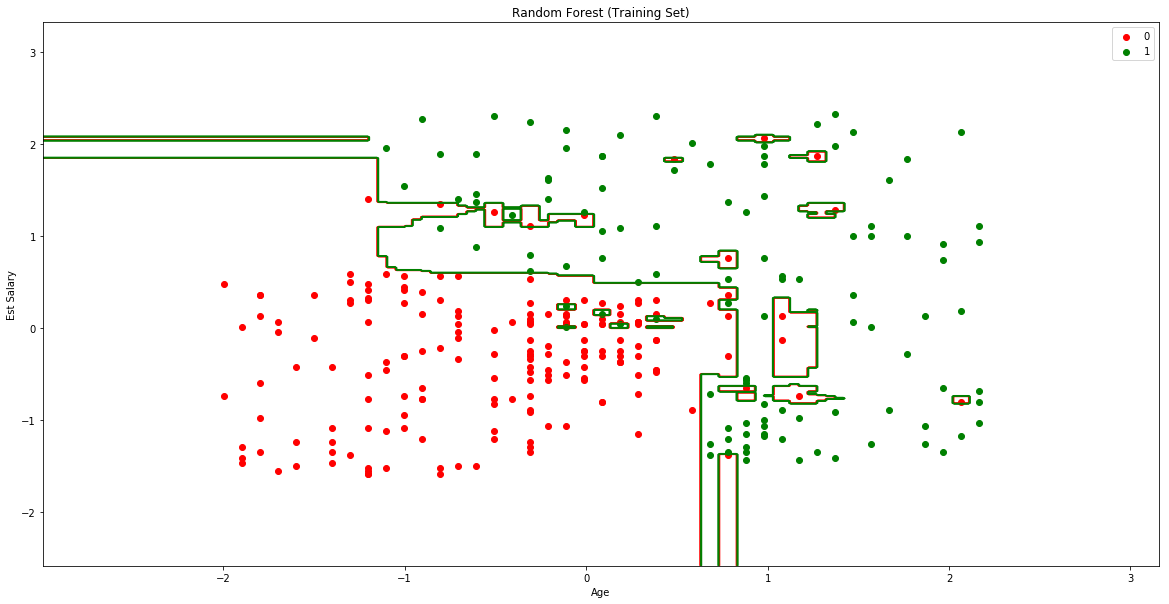

In [17]:
#Visualizing the Random Forest training test results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.figure(figsize = [20,10])
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Random Forest (Training Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()

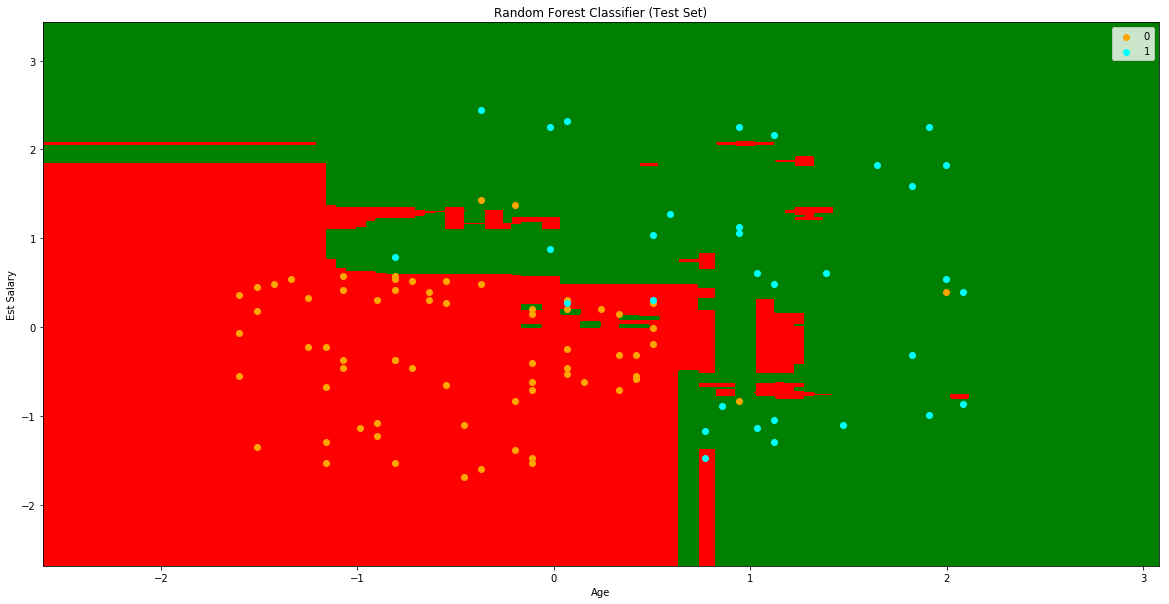

In [18]:
#Visualizing the Random Forest test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01), #returns coordinate matrices
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.figure(figsize=[20,10])
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('orange','cyan'))(i), label = j)
plt.title('Random Forest Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()